<a href="https://colab.research.google.com/github/deboradcm/IARTES/blob/master/01_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 01

## Indução e Regressão

[0.         0.05050505 0.1010101  0.15151515 0.2020202  0.25252525
 0.3030303  0.35353535 0.4040404  0.45454545 0.50505051 0.55555556
 0.60606061 0.65656566 0.70707071 0.75757576 0.80808081 0.85858586
 0.90909091 0.95959596 1.01010101 1.06060606 1.11111111 1.16161616
 1.21212121 1.26262626 1.31313131 1.36363636 1.41414141 1.46464646
 1.51515152 1.56565657 1.61616162 1.66666667 1.71717172 1.76767677
 1.81818182 1.86868687 1.91919192 1.96969697 2.02020202 2.07070707
 2.12121212 2.17171717 2.22222222 2.27272727 2.32323232 2.37373737
 2.42424242 2.47474747 2.52525253 2.57575758 2.62626263 2.67676768
 2.72727273 2.77777778 2.82828283 2.87878788 2.92929293 2.97979798
 3.03030303 3.08080808 3.13131313 3.18181818 3.23232323 3.28282828
 3.33333333 3.38383838 3.43434343 3.48484848 3.53535354 3.58585859
 3.63636364 3.68686869 3.73737374 3.78787879 3.83838384 3.88888889
 3.93939394 3.98989899 4.04040404 4.09090909 4.14141414 4.19191919
 4.24242424 4.29292929 4.34343434 4.39393939 4.44444444 4.4949

Text(0.5, 1.0, 'Gráfico da função y = x^2')

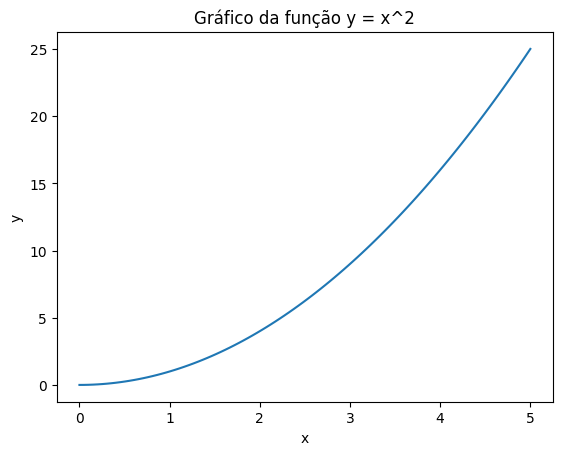

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

x100 = ... # Use np.linspace para gerar 100 pontos no intervalo [0, 5]

x100 = np.linspace(0,5,100)
print(x100)

#plt...Use plt.plot para plotar a curva

plt.plot (x100, x100**2)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico da função y = x^2')

### Uma função-conceito artificial

Vamos gerar uma pequena base fictícia para o seguinte problema:

- Seja $x$ a quantidade de horas que um aluno estudou por semana, qual será a nota $f(x)$ obtida na disciplina de IA?

Para isso, vamos propor uma função-conceito $f$ que produz uma curva não trivial.

In [4]:
f = lambda x: (np.sin(x+4.6) + np.sin(1.7*x + 4.8) + 3) * 2.3389

Vamos gerar um gráfico no intervalo $[0, 5]$ para vermos como essa função se comporta.

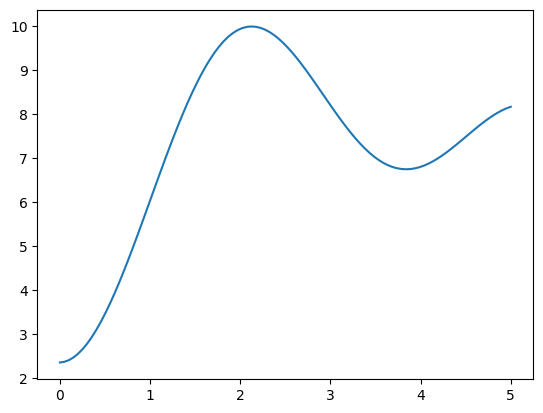

In [5]:

x100 = np.linspace(0, 5, 100)

f = lambda x: (np.sin(x + 4.6) + np.sin(1.7*x + 4.8) + 3) * 2.3389

y_values = f(x100)

plt.plot(x100, y_values, label='f(x)')

### Uma pequena base de treinamento

Agora vamos gerar uma base de treinamento. O ato de coletar dados é chamado **amostragem**, portanto essa base será a nossa **amostra**. Cada caso da amostra é chamado de **exemplo** ou **instância**.

Cada exemplo da nossa amostra será um par $(x_i, y_i)$. O valor $x_i$ é um **atributo de entrada** que **caracteriza** o exemplo. Normalmente usamos dados que possuem múltiplos atributos, mas para este exercício, teremos um único atributo de entrada. Já o valor $y_i$ é um **atributo-alvo** chamado **rótulo**. Em problemas de regressão o rótulo é um valor numérico e o objetivo do Aprendizado de Máquina é prever o rótulo correto $y_i$ (nota) para um valor de entrada $x_i$ (quantidade de horas estudadas).

Neste exercício os dados serão gerados artificialmente. Os valores $x_i$ serão tomados uniformemente entre 0 e 5. Os valores $y_i$ serão gerados com base na função $f$, acrescidos de um pequeno ruído aleatório.

Para gerar o ruído, usaremos o módulo `numpy.random`. Primeiro vamos criar um objeto da classe `RandomState`, especificando uma semente inicial. O motivo ficará claro em breve.

Para cada $x_i$, o valor de $y_i$ será calculado da seguinte forma:

$$y_i = f(x_i) + z_i$$

Sendo que $z_i$ é um valor aleatório escolhido de uma distribuição normal com média $0$ e desvio padrão $0{,}2$. Dessa forma o rótulo será um valor bem próximo, mas não idêntico ao produzido pela função-conceito. Normalmente é isso o que acontece no mundo real: os dados possuem uma parte regular e um ruído aleatório.

In [7]:
state = np.random.RandomState(42)  #produz números pseudos aleatório
print(state.rand())
noise = state.normal(loc=0, scale=0.2, size=11)
print(noise)

0.3745401188473625
[-0.22237602  0.06378044  0.05580826  0.20210306 -0.11617563 -0.10503396
 -0.11427603 -0.18481657 -0.5225098   0.19007394  0.16328902]


In [10]:

x = np.arange(0, 5.1, 0.5)
print(x)
y = f(x) + noise
print(y)



[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
[2.14025068 3.5311289  6.09918286 8.84084005 9.82946317 9.47284329
 8.09616059 6.8316307  6.28735777 7.68154776 8.33831282]


Vamos observar esses dados, juntamente com a função-conceito?

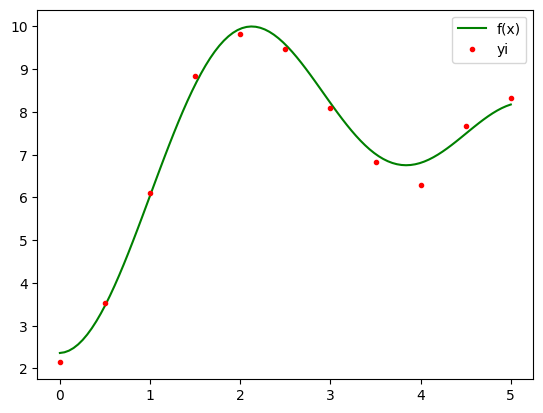

In [13]:
plt.plot(x100, f(x100), 'g', label='f(x)'); #está plotando a função conceito
plt.plot(x, y, '.r', label='yi');
plt.legend();

Pronto! Essa nossa pequena base será a **experiência E** que utilizaremos para treinar o modelo.

In [14]:
pd.DataFrame(np.array([x,y]).T, columns=["Estudo p/ dia", "Nota"])

,Estudo p/ dia,Nota
0,0.0,2.140251
1,0.5,3.531129
2,1.0,6.099183
3,1.5,8.840840
4,2.0,9.829463
5,2.5,9.472843
6,3.0,8.096161
7,3.5,6.831631
8,4.0,6.287358
9,4.5,7.681548


### Modelo de regressão

O nosso modelo $\hat{h}(x)$ será uma função de regressão linear. Ela terá a seguinte forma:

$$\hat{h}(x) = w_0 + w_1\cdot{}x$$

Lembrando um pouco de geometria analítica, podemos ver que $\hat{h}$ é a equação de uma reta. O nosso modelo vai tentar "encaixar" os pontos do conjunto de treinamento em uma reta.

Observe que o nosso modelo usa a variável de entrada $x$ e dois valores adicionais:

- $w_0$ é um **viés**
- $w_1$ é um **parâmetro** (que, no contexto de regressão, também é chamado **peso**)

O objetivo do treinamento é buscar (aprender) os melhores parâmetros para o conjunto de dados.

O algoritmo que vamos utilizar chama-se **gradiente descendente**. Para facilitar sua implementação, precisamos criar uma matriz com 11 linhas (o número de exemplos) e 2 colunas (o número de parâmetros).

A primeira coluna dessa matriz conterá apenas o valor $1$. A segunda coluna conterá os dados do conjunto de entrada.

$$X = \begin{pmatrix}1 & x_1 \\ 1 & x_2 \\ 1 & x_3 \\ \vdots & \vdots \\ 1 & x_{11}\end{pmatrix}$$

Também precisaremos de um **vetor de pesos**. Esses serão os parâmetros que iremos treinar. Como nossa base possui apenas um atributo, então o vetor deve ter dois pesos (o primeiro é o viés).

$$w = \begin{pmatrix}w_0 \\ w_1\end{pmatrix}$$

Essas matrizes são construídas porque, quando nós as multiplicamos, o resultado equivale à aplicação da função $f(x)$ em cada linha da matriz $X$.

$$X \times w = \begin{pmatrix}w_0 + w_1x_1 \\ w_0 + w_1x_2 \\ w_0 + w_1x_3 \\ \vdots \\ w_0 + w_1x_{11}\end{pmatrix}$$

A diferença entre $X \times w$ e os valores reais $y$ é o **erro** cometido pelo modelo. Esse erro, quando calculado nos dados do conjunto de treinamento, é chamado **erro empírico**.

Nosso algoritmo será o seguinte:

**Algoritmo** RegressãoLinear($X$, $y$, $\eta$, $\delta$):<br>
&nbsp; &nbsp; &nbsp; &nbsp; /* *Normaliza os dados* */<br>
&nbsp; &nbsp; &nbsp; &nbsp; **para cada** coluna de $X$:<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $c$ ← valores da coluna<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $m$ ← média dos valores em $c$<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $\sigma$ ← desvio padrão dos valores em $c$<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; calcule $\displaystyle\frac{c - m}{\sigma}$ para cada valor em $c$<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; atualize a coluna com os novos valores de $c$<br>
<br>
&nbsp; &nbsp; &nbsp; &nbsp; *Cria um vetor de pesos aleatórios inicial*<br>
&nbsp; &nbsp; &nbsp; &nbsp; $n$ ← número de colunas em $X$<br>
&nbsp; &nbsp; &nbsp; &nbsp; $w$ ← escolha $n$ valores aleatórios entre $0$ e $1$<br>
<br>
&nbsp; &nbsp; &nbsp; &nbsp; *Treina por $\delta$ épocas*<br>
&nbsp; &nbsp; &nbsp; &nbsp; **para** $i$ **de** 1 **até** $\delta$:<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; *Calcula os erros*<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $\hat{y}$ ← $w$ * $X$<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $e$ ← $\hat{y} - y$<br>
            <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; *Calcula o fator de atualização*<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $g$ ← $e$ * $X$<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $g$ ← $\displaystyle\frac{e}{\text{num. de exemplos}}$<br>
            <br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; *Atualiza os pesos*<br>
&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; $w$ ← $w - \eta{}g$<br>
        <br>
&nbsp; &nbsp; &nbsp; &nbsp; *Retorna os pesos encontrados*<br>
&nbsp; &nbsp; &nbsp; &nbsp; **retorna** $w$<br>

Observe que o algoritmo utiliza o erro empírico. O objetivo do algoritmo é minimizar esse erro. O aprendizado ocorre justamente conforme o algoritmo minimiza esse erro. O erro empírico é nossa **métrica de desempenho P**.

Esses passos em Python são feitos da seguinte forma.

Primeiro, vamos gerar a matriz aumentada.

In [15]:
X = np.array([np.ones_like(x), x]).T
X

array([[1. , 0. ],
       [1. , 0.5],
       [1. , 1. ],
       [1. , 1.5],
       [1. , 2. ],
       [1. , 2.5],
       [1. , 3. ],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 4.5],
       [1. , 5. ]])

In [16]:
w = np.array([0.2, 0.5])

In [18]:
ypred = np.dot(X, w) # usando np.dot, faça o produto da matriz X pela matriz w
 #valor perdido

Em seguida, vamos fazer a normalização. Com isso todas as colunas ficarão aproximadamente com a mesma magnitude.

In [19]:
def normaliza(X):
    std = np.std(X, axis=0)
    std[std == 0] = 1
    medias = np.mean(X, axis=0)
    Xnorm = (X - medias) / std
    return Xnorm

Xnorm = normaliza(X)
Xnorm

array([[ 0.        , -1.58113883],
       [ 0.        , -1.26491106],
       [ 0.        , -0.9486833 ],
       [ 0.        , -0.63245553],
       [ 0.        , -0.31622777],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.31622777],
       [ 0.        ,  0.63245553],
       [ 0.        ,  0.9486833 ],
       [ 0.        ,  1.26491106],
       [ 0.        ,  1.58113883]])

In [20]:
y - ypred

array([1.94025068, 3.0811289 , 5.39918286, 7.89084005, 8.62946317,
       8.02284329, 6.39616059, 4.8816307 , 4.08735777, 5.23154776,
       5.63831282])

Em seguida, vamos gerar um vetor de parâmetros aleatório. Esses parâmetros representam um modelo de regressão que provavelmente não é muito bom.

In [21]:
w = np.array([0, 0.5])

A função a seguir pode ser usada para desenhar o modelo. Ela recebe como argumentos:

- `X`: a matriz aumentada e normalizada
- `x`: as variáveis de treinamento
- `y`: os rótulos de treinamento
- `w`: o vetot de pesos do modelo
- `xreal`: as coordenadas x da curva real (entrada da função-conceito)
- `yreal`: os rótulos verdadeiros (saída da função-conceito)

In [22]:
def desenha_modelo(X, x, y, w, xreal, yreal, w2=None, w3=None):
    ypred = np.dot(X, w) + np.mean(y)
    plt.plot(xreal, yreal, 'g', label='f(x)');
    plt.plot(x, y, '.r', label='yi');
    plt.plot(x, ypred, 'b', label='h');
    if w2 is not None:
        ypred = np.dot(X, w2) + np.mean(y)
        plt.plot(x, ypred, 'k--', label='h2');
    if w3 is not None:
        ypred = np.dot(X, w3) + np.mean(y)
        plt.plot(x, ypred, 'b--', label='h3');
    plt.legend();


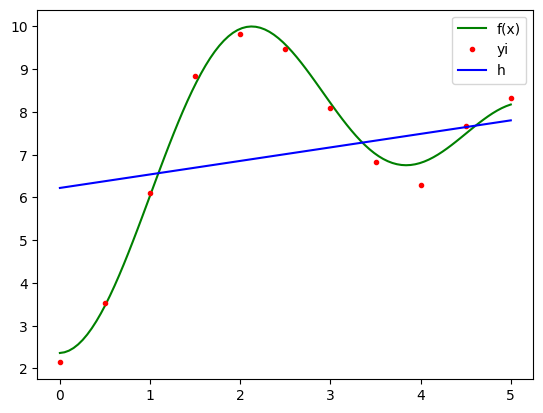

In [23]:
desenha_modelo(Xnorm, x, y, w, x100, f(x100))

Vamos treinar o modelo por 3 épocas.

In [24]:
def grad(X, y, w):
    ypred = np.dot(X, w)
    erros = ypred - y
    g = np.dot(erros, X) / len(x)
    return g

In [25]:
def treina(X, y, w, eta, epocas):
    for i in range(epocas):
        w = w - eta*grad(X, y, w)
    return w

In [26]:
w2 = treina(Xnorm, y, w, 0.5, 3)

Veja como os pesos foram atualizados:

In [27]:
w2

array([0.        , 1.12917049])

Vamos ver o novo modelo.

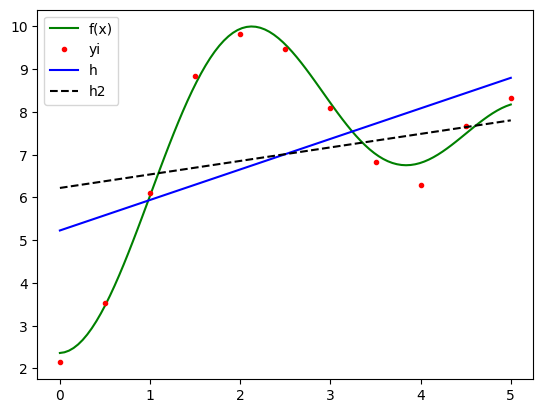

In [28]:
desenha_modelo(Xnorm, x, y, w2, x100, f(x100), w)

Vamos treinar um pouco mais...

In [29]:
w3 = treina(Xnorm, y, w2, 0.5, 3)

array([0.       , 1.2078168])

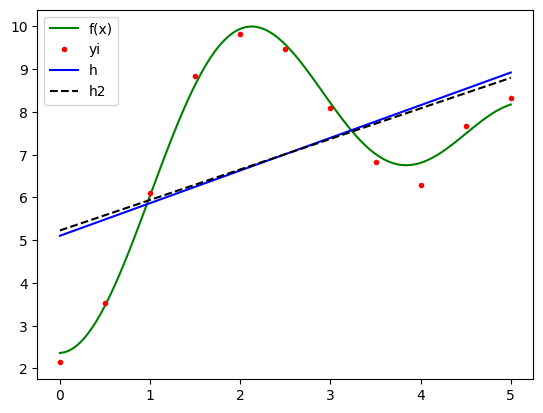

In [30]:
desenha_modelo(Xnorm, x, y, w3, x100, f(x100), w2)
w3

### Mais atributos

O modelo encontrado anteriormente é muito simples. Possuindo apenas dois parâmetros, tudo o que o modelo pode fazer é ajustar o ângulo de interceptação e a altura em que a reta cruza o eixo das ordenadas.

Uma versão um pouco mais elaborada da regressão linear é a seguinte:

$$\begin{eqnarray}\hat{h}(x) & = & \displaystyle\sum_{i=0}^{M}w_ix^i\\ & = & w_0 + w_1x + w_2x^2 + w_3x^3 + \ldots + w_mx^m\end{eqnarray}$$

O conjunto de dados continua tendo apenas um atributo de entrada (a quantidade de horas que o estudante se dedicou), porém o modelo observa esse conjunto em um espaço de $M$ dimensões.

Isso aumenta a **capacidade** do modelo e ele pode fazer aproximações de conjuntos mais elaborados.

Os passos são os mesmos. Começamos construindo uma matriz que possui número de linhas igual ao número de exemplos. Porém agora ela possuirá $M$ colunas.

$$X = \begin{pmatrix}1 & x_1 & x_1^2 & x_1^3 & \ldots & x_1^M \\
            1 & x_2 & x_2^2 & x_2^3 & \ldots &x_2^M \\
            1 & x_3 & x_3^2 & x_3^3 & \ldots & x_3^M \\
              &     &    \vdots   &       &  &  \vdots \\
            1 & x_{11} & x_{11}^2 & x_{11}^3 & \ldots & x_{11}^M \end{pmatrix}$$
            
E o vetor de pesos também terá $M$ elementos.

$$w = \begin{pmatrix}w_0 \\ w_1 \\ w_2 \\ w_3 \\ \vdots \\ w_M\end{pmatrix}$$

Os passos em Python são...

Primeiro, criar a matriz estendida.

In [31]:
Xm = np.array([np.ones_like(x), x, x**2, x**3, x**4]).T
Xm

array([[1.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00],
       [1.000000e+00, 5.000000e-01, 2.500000e-01, 1.250000e-01,
        6.250000e-02],
       [1.000000e+00, 1.000000e+00, 1.000000e+00, 1.000000e+00,
        1.000000e+00],
       [1.000000e+00, 1.500000e+00, 2.250000e+00, 3.375000e+00,
        5.062500e+00],
       [1.000000e+00, 2.000000e+00, 4.000000e+00, 8.000000e+00,
        1.600000e+01],
       [1.000000e+00, 2.500000e+00, 6.250000e+00, 1.562500e+01,
        3.906250e+01],
       [1.000000e+00, 3.000000e+00, 9.000000e+00, 2.700000e+01,
        8.100000e+01],
       [1.000000e+00, 3.500000e+00, 1.225000e+01, 4.287500e+01,
        1.500625e+02],
       [1.000000e+00, 4.000000e+00, 1.600000e+01, 6.400000e+01,
        2.560000e+02],
       [1.000000e+00, 4.500000e+00, 2.025000e+01, 9.112500e+01,
        4.100625e+02],
       [1.000000e+00, 5.000000e+00, 2.500000e+01, 1.250000e+02,
        6.250000e+02]])

Note como as colunas possuem magnitudes bem distintas. Isso porque $x^4$ rapidamente se afasta de $x$. Isso reforça a importância de normalizar a matriz.

In [32]:
Xm_norm = normaliza(Xm)
Xm_norm

array([[ 0.        , -1.58113883, -1.06600358, -0.85179743, -0.73030217],
       [ 0.        , -1.26491106, -1.03554634, -0.84869998, -0.72998506],
       [ 0.        , -0.9486833 , -0.9441746 , -0.82701787, -0.72522843],
       [ 0.        , -0.63245553, -0.79188838, -0.76816641, -0.70461634],
       [ 0.        , -0.31622777, -0.57868766, -0.65356094, -0.64912225],
       [ 0.        ,  0.        , -0.30457245, -0.46461678, -0.53210901],
       [ 0.        ,  0.31622777,  0.03045725, -0.18274927, -0.31932883],
       [ 0.        ,  0.63245553,  0.42640143,  0.21062627,  0.03107669],
       [ 0.        ,  0.9486833 ,  0.88326011,  0.73409451,  0.56857655],
       [ 0.        ,  1.26491106,  1.40103328,  1.40624012,  1.35025039],
       [ 0.        ,  1.58113883,  1.97972094,  2.24564777,  2.44078846]])

Em seguida, criamos um vetor de pesos com $M$ valores iniciais aleatórios...

In [33]:
wm = np.array([0.1, 0.2, 0.4, -0.5, -0.5], dtype=np.float64)

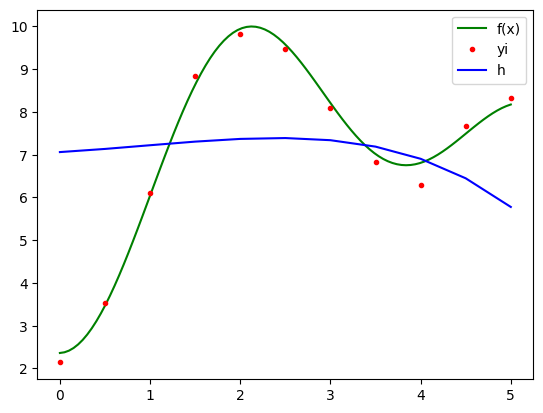

In [34]:
desenha_modelo(Xm_norm, x, y, wm, x100, f(x100))

E efetuamos o treinamento...

In [35]:
wm2 = treina(Xm_norm, y, wm, 0.5, 100)

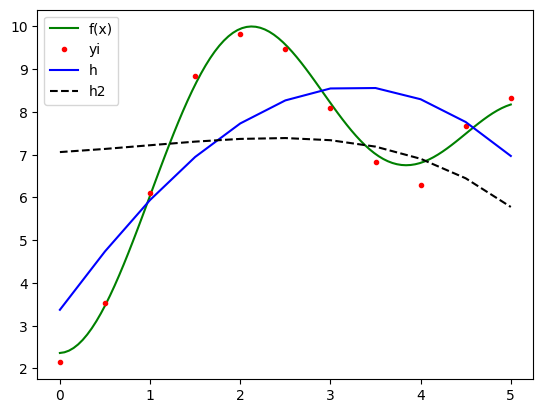

In [36]:
desenha_modelo(Xm_norm, x, y, wm2, x100, f(x100), wm)

...e de novo...

In [37]:
wm3 = treina(Xm_norm, y, wm2, 0.5, 1000)

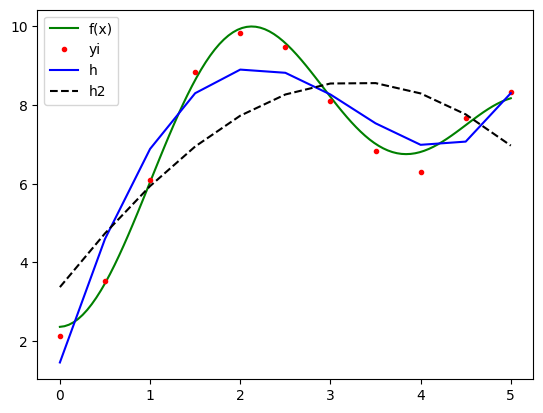

In [38]:
desenha_modelo(Xm_norm, x, y, wm3, x100, f(x100), wm2)

...até ficarmos satisfeitos.

In [39]:
wm4 = treina(Xm_norm, y, wm3, 0.5, 1000)

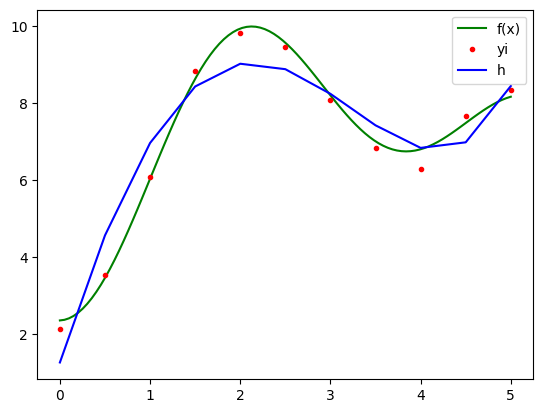

In [40]:
desenha_modelo(Xm_norm, x, y, wm4, x100, f(x100))